**Harsh Sankar Naicker : 18BLC1088                  harshunaicker@gmail.com
 Akshara Pramod : 18BLC1149                         akshararuhi@gmail.com**    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sys

# use seaborn plotting defaults
import seaborn as se; se.set()

In [ ]:
datasets = pd.read_csv('loan_data_set.csv')

In [ ]:
datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(datasets)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,614
Total Missing (%),1.9%
Total size in memory,62.5 KiB
Average record size in memory,104.2 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [ ]:
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Cleaning the Dataset (only taking care of Applicant Income and Loan Amount because we are using only these for prediction)**

In [ ]:
datasets['LoanAmount'].fillna(datasets['LoanAmount'].mean(),inplace=True)

In [ ]:
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
Y=datasets.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

**Choosing the Features ApplicantIncome and LoanAmount for training the Model**

In [ ]:
X=datasets.iloc[:,[6,8]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Plotting the Training Set**

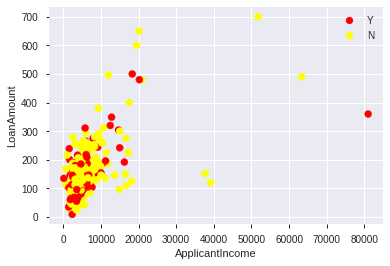

In [ ]:
%matplotlib inline
#se.lmplot(data = X_train, x = "LoanAmount", y = "ApplicantIncome", hue = Y_train, palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})
s=plt.scatter(sc.inverse_transform(X_train)[:,0], sc.inverse_transform(X_train)[:,1], c=Y_train, s=50, cmap='autumn');
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.legend(handles=s.legend_elements()[0], labels=["Y","N"])

**Training the Model**

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Function for Plotting the Decision Boundary**

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Plotting the Decision Boundary**

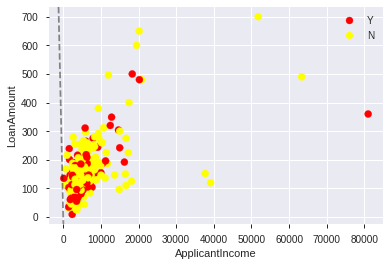

In [ ]:
%matplotlib inline
s=plt.scatter(sc.inverse_transform(X_train)[:,0], sc.inverse_transform(X_train)[:,1], c=Y_train, s=50, cmap='autumn');
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.legend(handles=s.legend_elements()[0], labels=["Y","N"])
plot_svc_decision_function(model);

In [ ]:
sc.inverse_transform(model.support_vectors_)

array([[3.57200000e+03, 1.52000000e+02],
       [5.50000000e+03, 1.05000000e+02],
       [7.93300000e+03, 2.75000000e+02],
       [2.37800000e+03, 4.60000000e+01],
       [4.16600000e+03, 1.16000000e+02],
       [6.03300000e+03, 1.60000000e+02],
       [3.52200000e+03, 8.10000000e+01],
       [3.41800000e+03, 1.35000000e+02],
       [5.00000000e+03, 7.20000000e+01],
       [4.23000000e+03, 1.12000000e+02],
       [2.40000000e+03, 1.04000000e+02],
       [7.66000000e+03, 1.04000000e+02],
       [8.30000000e+03, 1.52000000e+02],
       [6.63300000e+03, 1.46412162e+02],
       [5.56800000e+03, 1.75000000e+02],
       [5.00000000e+03, 1.03000000e+02],
       [4.73500000e+03, 1.38000000e+02],
       [4.58300000e+03, 1.12000000e+02],
       [3.75000000e+03, 1.13000000e+02],
       [2.88900000e+03, 4.50000000e+01],
       [6.40600000e+03, 1.50000000e+02],
       [3.71700000e+03, 1.51000000e+02],
       [1.66800000e+03, 2.01000000e+02],
       [3.08900000e+03, 1.21000000e+02],
       [9.166000

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[  0  66]
 [  0 119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.64      1.00      0.78       119

    accuracy                           0.64       185
   macro avg       0.32      0.50      0.39       185
weighted avg       0.41      0.64      0.50       185

Accuracy: 0.6432432432432432


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred2=model.predict(model.support_vectors_)

In [ ]:
model.support_vectors_.shape

(254, 2)

In [ ]:
X_train2=np.array(X_train)
model_support_vectors_2=np.array(model.support_vectors_)

**Finding the Indices of the Support Vectors for Poisioning Later**

In [ ]:
index=[]
for i in range(model_support_vectors_2.shape[0]):
  for j in range(X_train2.shape[0]):
    k=X_train2[j]==model_support_vectors_2[i]
    if(k.all()):
      index.append(j)


**Poisoning the Support Vectors**

In [ ]:
for i in index:
  Y_train[i]=1-Y_train[i]

**Scatter Plot with the Poisoned Training Set**

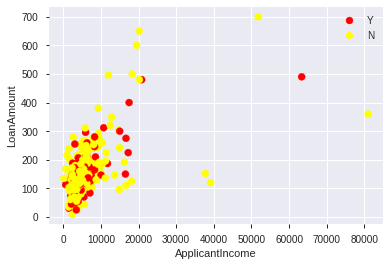

In [ ]:
%matplotlib inline
#se.lmplot(data = datasets, x = "LoanAmount", y = "ApplicantIncome", hue = 'Loan_Status', palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})
s=plt.scatter(sc.inverse_transform(X_train)[:,0], sc.inverse_transform(X_train)[:,1], c=Y_train, s=50, cmap='autumn');
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.legend(handles=s.legend_elements()[0], labels=["Y","N"])

**Training the SVM Model with the Poisioned Training Set**

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Plotting the Decision Boundary**

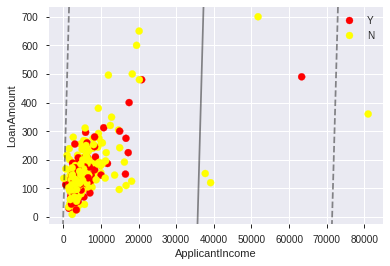

In [ ]:
%matplotlib inline
#se.lmplot('LoanAmount','ApplicantIncome',data = datasets, hue = 'Loan_Status', palette = 'Set1', fit_reg = False, scatter_kws = {"s" : 70})
s=plt.scatter(sc.inverse_transform(X_train)[:,0], sc.inverse_transform(X_train)[:,1], c=Y_train, s=50, cmap='autumn');
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.legend(handles=s.legend_elements()[0], labels=["Y","N"])
plot_svc_decision_function(model);

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[  5  53]
 [  1 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.09      0.16        58
           1       0.70      0.99      0.82       127

    accuracy                           0.71       185
   macro avg       0.77      0.54      0.49       185
weighted avg       0.74      0.71      0.61       185

Accuracy: 0.7081081081081081
